In [18]:
## Q1

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from google.colab import files

# Upload the file
uploaded = files.upload()

# Extract the correct filename
filename = list(uploaded.keys())[0]

# Load the dataset using the correct filename
df = pd.read_csv(filename)

# Display the first few rows to verify the data
df.head()

Saving eBayAuctions.csv to eBayAuctions (1).csv


,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [8]:
# Convert 'Duration' to a categorical variable
df['Duration'] = df['Duration'].astype('category')

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Category', 'currency', 'endDay'], drop_first=True)

# Split data into features and target
X = df.drop(columns=['Competitive?'])
y = df['Competitive?']

# Split into training (60%) and validation (40%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Display the shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_valid.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Validation Labels Shape: {y_valid.shape}")


Training Features Shape: (1183, 29)
Validation Features Shape: (789, 29)
Training Labels Shape: (1183,)
Validation Labels Shape: (789,)


In [9]:
# PART (A)

from sklearn.tree import DecisionTreeClassifier, export_text

# Build the classification tree
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)
clf.fit(X_train, y_train)

# Extract and display the decision rules
rules = export_text(clf, feature_names=list(X_train.columns))
print(rules)


|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration <= 8.50
|   |   |   |--- class: 1
|   |   |--- Duration >  8.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   |   |---

In [11]:
# PART (D)

# Remove ClosePrice from the dataset to simulate prediction with only pre-auction variables
X_train_predictive = X_train.drop(columns=['ClosePrice'])
X_valid_predictive = X_valid.drop(columns=['ClosePrice'])

# Build a new classification tree using only predictive variables
clf_predictive = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)
clf_predictive.fit(X_train_predictive, y_train)

# Extract and display the decision rules for the predictive model
predictive_rules = export_text(clf_predictive, feature_names=list(X_train_predictive.columns))
print(predictive_rules)


|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- sellerRating <= 3138.50
|   |   |   |--- class: 1
|   |   |--- sellerRating >  3138.50
|   |   |   |--- class: 1
|   |--- OpenPrice >  1.04
|   |   |--- sellerRating <= 2365.50
|   |   |   |--- sellerRating <= 1099.50
|   |   |   |   |--- sellerRating <= 493.50
|   |   |   |   |   |--- sellerRating <= 102.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sellerRating >  102.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sellerRating >  493.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- sellerRating >  1099.50
|   |   |   |   |--- OpenPrice <= 3.32
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- OpenPrice >  3.32
|   |   |   |   |   |--- class: 1
|   |   |--- sellerRating >  2365.50
|   |   |   |--- class: 0
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- sellerRating <= 128.00
|   |   |   |--- class: 1
|   |   |--- sellerRating >  128.00
|   |   |   |--- class

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


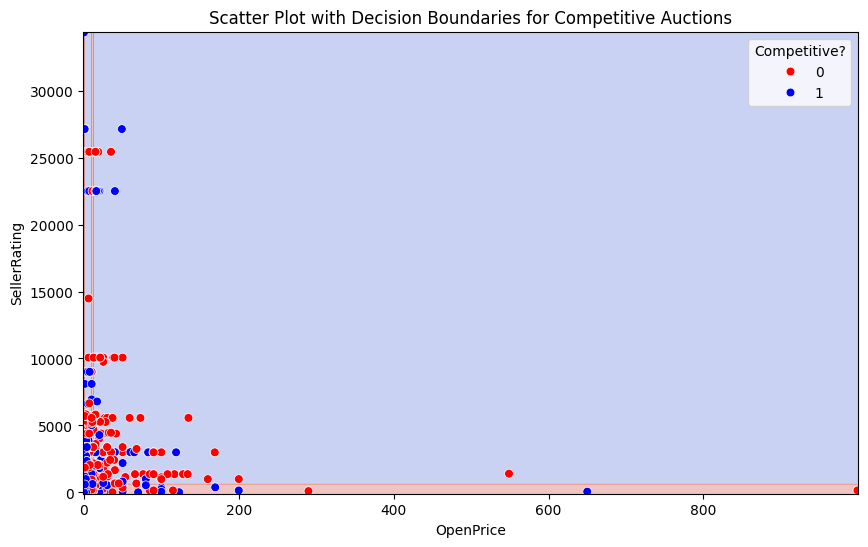

In [15]:
# PART (E)
import matplotlib.pyplot as plt
import seaborn as sns

# Train a new classification tree using only OpenPrice and sellerRating
X_train_plot = X_train_predictive[['OpenPrice', 'sellerRating']]
X_valid_plot = X_valid_predictive[['OpenPrice', 'sellerRating']]

clf_visual = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)
clf_visual.fit(X_train_plot, y_train)

# Generate a meshgrid for the plot
x_min, x_max = X_train_plot['OpenPrice'].min() - 1, X_train_plot['OpenPrice'].max() + 1
y_min, y_max = X_train_plot['sellerRating'].min() - 100, X_train_plot['sellerRating'].max() + 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 100))

# Predict on the meshgrid to visualize boundaries
Z = clf_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot actual points from the correct DataFrame
sns.scatterplot(x=X_train_plot['OpenPrice'], y=X_train_plot['sellerRating'], hue=y_train, palette={0:'red', 1:'blue'}, s=40)

# Labels and title
plt.xlabel('OpenPrice')
plt.ylabel('SellerRating')
plt.title('Scatter Plot with Decision Boundaries for Competitive Auctions')
plt.legend(title='Competitive?')
plt.show()


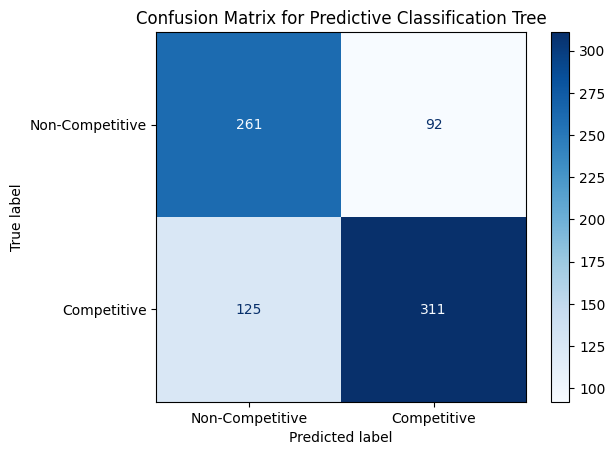

AUC Score: 0.73


In [16]:
# Part (f)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import numpy as np

# Predict on the validation set using the predictive tree
y_pred = clf_predictive.predict(X_valid_predictive)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Competitive", "Competitive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Predictive Classification Tree")
plt.show()

# Calculate AUC (Area Under Curve) as a performance measure
auc_score = roc_auc_score(y_valid, y_pred)
print(f"AUC Score: {auc_score:.2f}")


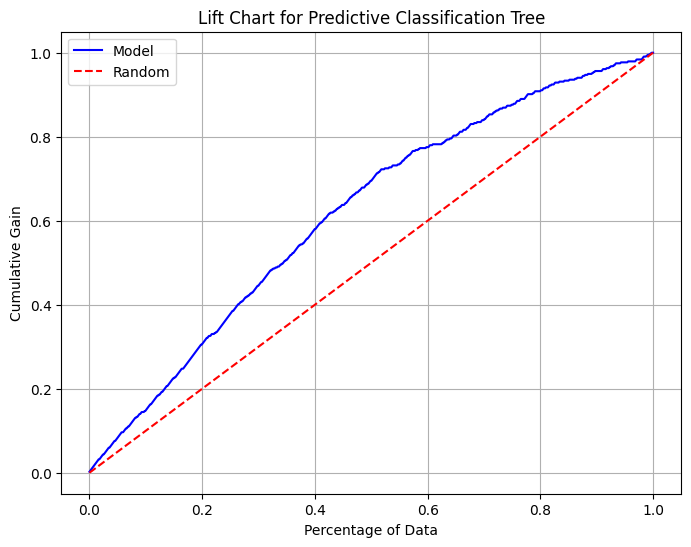

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate probabilities for the validation set
y_probs = clf_predictive.predict_proba(X_valid_predictive)[:, 1]

# Sort by predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
y_valid_sorted = np.array(y_valid)[sorted_indices]

# Calculate cumulative gains
cumulative_positives = np.cumsum(y_valid_sorted)
total_positives = sum(y_valid_sorted)
cumulative_gains = cumulative_positives / total_positives
random_gains = np.linspace(0, 1, len(y_valid_sorted))

# Plot the lift chart
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(y_valid_sorted)), cumulative_gains, label='Model', color='blue')
plt.plot(np.linspace(0, 1, len(y_valid_sorted)), random_gains, label='Random', color='red', linestyle='--')
plt.xlabel('Percentage of Data')
plt.ylabel('Cumulative Gain')
plt.title('Lift Chart for Predictive Classification Tree')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##Q3

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [21]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [22]:
selected_columns = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic',
                    'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period',
                    'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
                    'Sport_Model', 'Tow_Bar']

df = df[selected_columns]

In [23]:
# Convert categorical variables (Fuel_Type to dummies)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [24]:
# Convert boolean columns to integers (0 and 1)
bool_cols = ['Automatic', 'Mfr_Guarantee', 'Airco', 'Automatic_airco',
             'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
df[bool_cols] = df[bool_cols].astype(int)


In [25]:
# Split into training (60%) and validation (40%) sets
X = df.drop(columns='Price')
y = df['Price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [26]:
# Part A (i)
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Train a full-grown regression tree
reg_tree_full = DecisionTreeRegressor(random_state=1)
reg_tree_full.fit(X_train, y_train)

# Show feature importance
importances = pd.Series(reg_tree_full.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Display top 4 predictors
print("Top 4 most important predictors:")
print(importances.head(4))

Top 4 most important predictors:
Age_08_04          0.844867
HP                 0.053789
KM                 0.049601
Automatic_airco    0.013358
dtype: float64


Train RMSE: 0.00
Validation RMSE: 1492.34


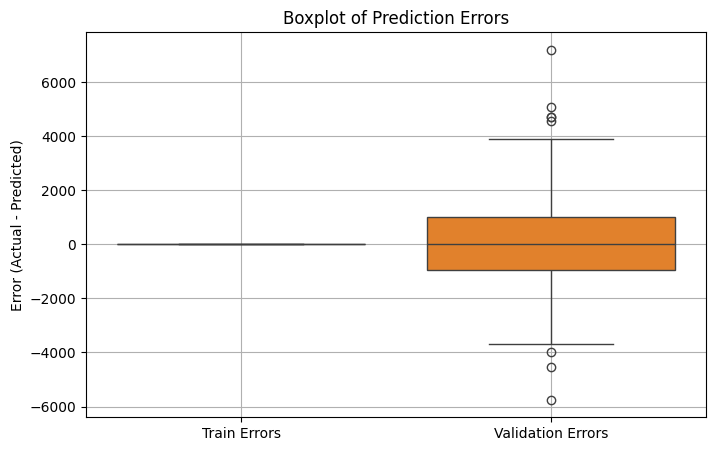

In [27]:
# Part a (ii)
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
train_preds = reg_tree_full.predict(X_train)
valid_preds = reg_tree_full.predict(X_valid)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {valid_rmse:.2f}")

# Create DataFrame for boxplot
error_df = pd.DataFrame({
    'Train Errors': y_train - train_preds,
    'Validation Errors': y_valid - valid_preds
})

# Boxplot of prediction errors
plt.figure(figsize=(8, 5))
sns.boxplot(data=error_df)
plt.title('Boxplot of Prediction Errors')
plt.ylabel('Error (Actual - Predicted)')
plt.grid(True)
plt.show()


In [28]:
# Part A (iii)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [5, 10, 20, 30, 50]
}

# Set up GridSearchCV
reg_tree = DecisionTreeRegressor(random_state=1)
grid_search = GridSearchCV(reg_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
best_train_preds = best_tree.predict(X_train)
best_valid_preds = best_tree.predict(X_valid)

# Compute RMSE
best_train_rmse = np.sqrt(mean_squared_error(y_train, best_train_preds))
best_valid_rmse = np.sqrt(mean_squared_error(y_valid, best_valid_preds))

print(f"Tuned Train RMSE: {best_train_rmse:.2f}")
print(f"Tuned Validation RMSE: {best_valid_rmse:.2f}")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5}
Tuned Train RMSE: 991.14
Tuned Validation RMSE: 1200.32


In [29]:
# ----------------- PART B ------------------------

# Create 20 bins of price
df['Binned_Price'] = pd.cut(df['Price'], bins=20, labels=False)

# Use same predictors as before
X_cls = df.drop(columns=['Price', 'Binned_Price'])
y_cls = df['Binned_Price']

# Split the data
Xc_train, Xc_valid, yc_train, yc_valid = train_test_split(X_cls, y_cls, test_size=0.4, random_state=1)

# Check distribution (optional)
print("Training class distribution:")
print(yc_train.value_counts().sort_index())

Training class distribution:
Binned_Price
0       4
1      62
2     179
3     251
4     109
5      83
6      58
7      14
8      32
9      13
10     23
11     13
12     10
13      5
14      3
18      1
19      1
Name: count, dtype: int64


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set parameter grid
param_grid_cls = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [5, 10, 20, 30]
}

# GridSearchCV with 5-fold CV
clf = DecisionTreeClassifier(random_state=1)
grid_search_cls = GridSearchCV(clf, param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(Xc_train, yc_train)

# Best classifier
best_clf = grid_search_cls.best_estimator_
print("Best Parameters (Classifier):", grid_search_cls.best_params_)

# Predict and evaluate
train_preds_cls = best_clf.predict(Xc_train)
valid_preds_cls = best_clf.predict(Xc_valid)

train_acc = accuracy_score(yc_train, train_preds_cls)
valid_acc = accuracy_score(yc_valid, valid_preds_cls)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Validation Accuracy: {valid_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Classifier): {'max_depth': 5, 'min_samples_leaf': 5}
Train Accuracy: 0.57
Validation Accuracy: 0.49


In [31]:
# Part B (ii)
# Match the feature order exactly as in training
new_car_input = pd.DataFrame([{
    'Age_08_04': 77,
    'KM': 117000,
    'HP': 110,
    'Automatic': 0,
    'Doors': 5,
    'Quarterly_Tax': 100,
    'Mfr_Guarantee': 0,
    'Guarantee_Period': 3,
    'Airco': 1,
    'Automatic_airco': 0,
    'CD_Player': 0,
    'Powered_Windows': 0,
    'Sport_Model': 0,
    'Tow_Bar': 1,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1
}])

# Predict with Regression Tree
predicted_price = best_tree.predict(new_car_input)[0]
print(f"Predicted Price (Regression Tree): €{predicted_price:.2f}")

# Predict with Classification Tree
predicted_bin = best_clf.predict(new_car_input)[0]
print(f"Predicted Price Bin (Classification Tree): Bin {predicted_bin}")


Predicted Price (Regression Tree): €7301.52
Predicted Price Bin (Classification Tree): Bin 2
